In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

/var/folders/f8/snw3tlcs0y3bmnq5gqg26b5h0000gn/T/ipykernel_36483/4007545332.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [49]:
here = Path().resolve()
affiliations_path = here.joinpath("affiliations.tsv")
authors_path = here.joinpath("authors.tsv")

person_rename = {
    "Cristina Casals Casas": "Cristina Casals-Casas",
    "Chris Mungall": "Christopher J. Mungall",
    "Cathy H Wu": "Cathy Wu",
    "Frederic B. Bastian": "Frédéric B. Bastian",
    "Frédéric Bastian": "Frédéric B. Bastian",
    "Josie Burgin": "Josephine Burgin",
    "Kristian Axelsen": "Kristian B. Axelsen",
    "Lynn Schriml": "Lynn M Schriml",
    "Mark Miller": "Mark A. Miller",
    "Nicole A Vasilevsky": "Nicole A. Vasilevsky",
    "Nicole Vasilevsky": "Nicole A. Vasilevsky",
    "Paul D. Thomas": "Paul Denis Thomas",
    "Paul Thomas": "Paul Denis Thomas",
    "Rene Ranzinger": "René Ranzinger",
    "Sujay Patil": "Sujay Sanjeev Patil",
    "Susan Bello": "Susan M. Bello",
    "Tarcisio Mendes De Farias": "Tarcisio Mendes de Farias",
    "Chris Hunter": "Christopher Hunter",
    "James Balhoff": "James P. Balhoff",
}
affiliation_rename = {
    "SIB Swiss Institute of Bioinformatics": "Swiss Institute of Bioinformatics",
    "Swiss-Prot group, SIB Swiss Institute of Bioinformatics": "Swiss Institute of Bioinformatics",
    "Paul Thomas Lab, University of Southern California (USC)": "University of Southern California",
    "EMBL-European Bioinformatics Institute, Wellcome Genome Campus, Hinxton, Cambridge, UK": "EMBL-EBI",
    "European Bioinformatics Institute (EMBL-EBI)": "EMBL-EBI",
    "University of Lausanne (UNIL)": "University of Lausanne",
    "Universite de Lausanne": "University of Lausanne",
    "Complex Carbohydrate Research Center, The University of Georgia": "University of Georgia",
    "Complex Carbohydrate Research Center, University of Georgia": "University of Georgia",
    "The George Washington University": "George Washington University",
    "LBNL": "Lawrence Berkeley National Laboratory",
    "Environmental Genomics and Systems Biology Division, Lawrence Berkeley National Laboratory, Berkeley, CA, USA": "Lawrence Berkeley National Laboratory",
    "Swiss Institute of Bioinformatics / Swiss-Prot group": "Swiss Institute of Bioinformatics",
    "EMBL EBI": "EMBL-EBI",
    "European Bioinformatics Institute": "EMBL-EBI",
    "European Molecular Biology Laboratory, European Bioinformatics Institute (EMBL-EBI)": "EMBL-EBI",
    "University of Luxembourg, Luxembourg Centre for Systems Biomedicine": "University of Luxembourg",
    "Palacky University in Olomouc, Faculty of Science, Department of Physical Chemistry": "Palacký University Olomouc",
    "Placky University Olomouc": "Palacký University Olomouc",
    "Department of Biomedical Sciences, University of Padova": "University of Padova",
    "European Molecular Biology Laboratory, European Bioinformatics Institute": "EMBL-EBI",
    "University of Colorado, Anschutz Medical Campus": "University of Colorado",
    "European Bioinformatics Institute (EMBL-EBI), Wellcome Genome Campus, Hinxton, CB10 1SD, UK.": "EMBL-EBI",
    "European Bioinformatics Institute, EMBL-EBI": "EMBL-EBI",
    "WormBase, Alliance of Genome Resources, California Institute of Technology": "California Institute of Technology",
    "FlyBase, University of Cambridge": "University of Cambridge",
    "Luddy School of Informatics, Computing, and Engineering, Indiana University, Bloomington, IN 47408, USA": "Indiana University",
    "CBCB and CIS Department, University of Delaware": "University of Delaware",
    "SIB and HES-SO (HEG)": "Swiss Institute of Bioinformatics",
    "Keck School of Medicine, University of Southern California": "University of Southern California",
    "EFPL": "Ecole Polytechnique Fédérale de Lausanne",
    "Glycosciences Laboratory, Imperial College London": "Imperial College London",
    "Department of Botany and Plant Pathology, Oregon State University": "Oregon State University",
    "FlyBase/University Cambridge": "University of Cambridge",
    "Swiss-Prot group, SIB Swiss Institute of Bioinformatics (SIB)": "Swiss Institute of Bioinformatics",
    "EBI": "EMBL-EBI",
    "Georgetown University Medical Center": "Georgetown University",
    "Gene Ontology Consortium, Lawrence Berkeley National Laboratory": "Lawrence Berkeley National Laboratory",
    "The University of Sydney, Sydney School of Veterinary Science": "University of Sydney",
    "The Jackson Laboratory for Genomic Medicine": "Jackson Laboratory",
    "The Jackson Laboratory": "Jackson Laboratory",
    "Gene Ontology Consortium, University of Southern California": "University of Southern California",
       "Healx UK": "Healx",
    "Gene Ontology Consortium, The Jackson Laboratory": "Jackson Laboratory",
    "Gene Ontology Consortium, Swiss Institute of Bioinformatics": "Swiss Institute of Bioinformatics",
    "SGD/Stanford University": "Stanford University",
    "GigaScience Journal, BGI-Hong Kong": "GigaScience",
    "GigaScience Journal. BGI-Hong Kong": "GigaScience",
    "BGI-Hong Kong, GigaScience team": "GigaScience",
    "GigaScience, BGI": "GigaScience",
    "European Nucleotide Archive, EMBL-EBI": "EMBL-EBI",
    "ICBI, Georgetown University": "Georgetown University",
    "Renaissance Computing Institute, University of North Carolina, Chapel Hill, NC US": "University of North Carolina",
    "Mouse Genome Informatics, The Jackson Laboratory": "Jackson Laboratory",
    "National Research Council, UniPD": "University of Padova",
    "Gene Ontology Consortium, University of North Carolina": "University of North Carolina",
    "School of Pharmaceutical Sciences, Siksha ‘O’ Anusandhan Deemed to be University, Bhubaneswar-03, Odisha, India": "Siksha O Anusandhan University",
"Lawrence Berkeley National Laboratory, Berkeley, CA": "Lawrence Berkeley National Laboratory",
    "Department of Internal Medicine Translational Informatics Division, University of New Mexico, Albuquerque, NM, USA": "University of New Mexico",
    "Swiss Institute of Bioinformatics. Swiss-Prot group": "Swiss Institute of Bioinformatics",
    "University of New Mexico Health Sciences Center, Albuquerque, NM, USA": "University of New Mexico",
    "University of Rome Tor Vergata": "Università di Tor Vergata",
    "The Roslin Institute, University of Edinburgh": "University of Edinburgh",
    "Jackson Laboratory for Genomic Medicine": "Jackson Laboratory",
    "CIS Department, University of Delaware": "University of Delaware",
    "CBCB, University of Delaware": "University of Delaware",
    "TRANSLATIONAL AND INTEGRATIVE SCIENCES LAB": "University of Colorado",
    "Stanford Center for Biomedical Informatics Research, Stanford University, Stanford, CA, 94305 USA": "Stanford University",
 
}
merge = {
    (100, 215), # chris hunter
    (10, 71), # federica quaglia
    (43, 89), # harry caufield
    (63, 324), # jim balhoff
    (288, 77), # Jana Sponarova
    (107, 34), # jeet vora
    (44, 88), # justin reese
    (9, 241), # livia
    (7, 242), # luana
    (299, 354), # melissa haendel
    (183, 198), # patrick masson
    (38, 346), # raja
    (110, 346), # raja
}
merge = dict(merge)

In [50]:
directory = Path.home().joinpath('Downloads', 'Biocuration 2023_data_EasyChair_2023-01-04')
resources = Path()

df = pd.read_csv(directory / "author.csv")

df = df[df["first name"].notna()]
df["person #"] = df["person #"].map(lambda x: merge.get(x, x))
df["affiliation"] = df["affiliation"].map(lambda x: affiliation_rename.get(x, x))
df = df[~df["last name"].str.contains("Consortium")]
df = df[~df["last name"].str.contains("consortium")]
df["name"] = [f"{first} {last}" for first, last in df[["first name", "last name"]].values]
df["name"] = df["name"].map(lambda x: person_rename.get(x, x))
del df["first name"]
del df["last name"]

{
    }

# df.head()
pd.set_option('display.max_rows', None)
df["affiliation"].value_counts().to_frame()

,affiliation
Swiss Institute of Bioinformatics,79
EMBL-EBI,66
Lawrence Berkeley National Laboratory,17
"NEBION, Immunai company",10
University of Padova,10
University of Southern California,8
Palacký University Olomouc,8
University of Maryland School of Medicine,8
George Washington University,8
Ontario Institute for Cancer Research,8


In [4]:
if True or not authors_path.is_file():
    # don't overwrite this after curation has started
    cols = ["person #", "name", "email", "country", "affiliation"]
    sdf = df[cols].sort_values("name").drop_duplicates(["person #", "name"])
    sdf.to_csv(authors_path, sep='\t', index=False)
            
if True or not affiliations_path.is_file():
    # don't overwrite this after curation has started
    with affiliations_path.open("w") as file:
        print("name", "ror", "wikidata_ids", file=file, sep='\t')
        for affiliation in df.affiliation.unique():
            print(affiliation, "", "", sep="\t", file=file)

In [5]:
n_authors = df["person #"].nunique()
n_authors

343

In [10]:
n_abstracts = df["submission #"].nunique()
n_abstracts

84

In [11]:
n_affiliations = df["affiliation"].nunique()
n_affiliations

149

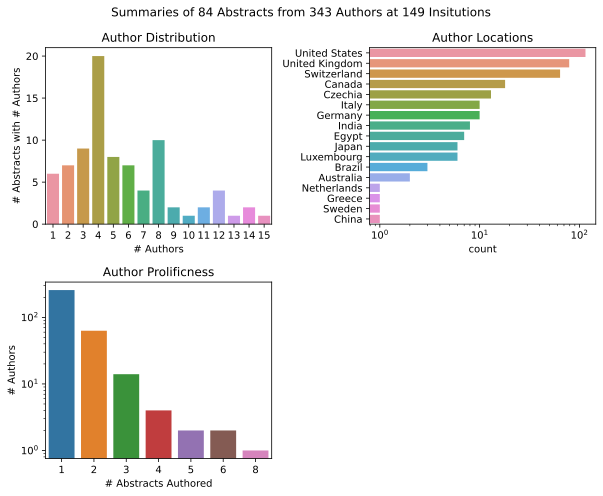

In [12]:
fix, ((lax, rax), (blax, brax)) = plt.subplots(2, 2, figsize=(8.5, 7))

sns.countplot(
    data=df.groupby("submission #").count()["person #"].to_frame(),
    x="person #",
    ax=lax,
)
lax.set_xlabel("# Authors")
lax.set_ylabel("# Abstracts with # Authors")
lax.set_title("Author Distribution")

sns.countplot(
    data=df[["person #", "country"]].drop_duplicates(), 
    y="country", 
    order=df[["person #", "country"]].drop_duplicates()["country"].value_counts().index,
    ax=rax,
)
rax.set_ylabel("")
rax.set_title("Author Locations")
rax.set_xscale("log")

sns.countplot(
    data=df.groupby("person #").count()["submission #"].sort_values(ascending=False).to_frame(),
    x="submission #", 
    ax=blax,
)
blax.set_yscale('log')
blax.set_xlabel("# Abstracts Authored")
blax.set_ylabel("# Authors")
blax.set_title("Author Prolificness")

brax.axis("off")
# sns.barplot(
#     data=df.groupby("country").count()["submission #"].to_frame().reset_index(),
#     y="country",
#     x="submission #",
#     ax=brax,
# )
# brax.set_xlabel("Number of Submissions")
# brax.set_ylabel("")
# brax.set_title("Submission Locations")

plt.suptitle(f"Summaries of {n_abstracts} Abstracts from {n_authors} Authors at {n_affiliations} Insitutions")
plt.tight_layout()
plt.savefig("/Users/cthoyt/Desktop/biocuration2023_abstracts_summary.png", dpi=350)
plt.show()

In [8]:
names = dict(df[["person #", "name"]].drop_duplicates().values)

In [9]:
print(tabulate([
    (names[n], count)
for n, count in Counter(df["person #"]).most_common(10)
    
], tablefmt="github", headers=["Name", "Count"]))

| Name                   |   Count |
|------------------------|---------|
| Alan Bridge            |       8 |
| Sandra Orchard         |       6 |
| Nicole Redaschi        |       6 |
| Christopher J. Mungall |       5 |
| Henning Hermjakob      |       5 |
| Marc Robinson-Rechavi  |       4 |
| Frédéric B. Bastian    |       4 |
| Paul Denis Thomas      |       4 |
| Cristina Casals-Casas  |       4 |
| Nancy George           |       3 |
